In [44]:
import pandas as pd
import numpy as np 
import seaborn as sns
import re
from sklearn.preprocessing import LabelEncoder, Imputer, StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import is_string_dtype, is_numeric_dtype, is_categorical_dtype
import matplotlib.pyplot as plt # visualization library

In [3]:
from keras.models import Sequential
import matplotlib.patches as mpatches
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.callbacks import ModelCheckpoint
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
# Import the library
import seaborn as sns
#import plotly.graph_objs as go
import matplotlib.pyplot as plt
import time
import os

In [45]:
data=pd.read_csv("Weather_data.csv")

In [46]:
data.head()

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


In [47]:
data.tail()

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
98908,20161130-12:30,Mist,17.0,0,0,NaN,78.0,NaN,1015.0,0,0,21.0,0,0,1.5,0.0,North,NaN,NaN,0.0
98909,20161130-13:00,Mist,16.0,0,0,NaN,83.0,NaN,1015.0,0,0,19.0,0,0,1.2,0.0,North,NaN,NaN,0.0
98910,20161130-15:00,Patches of Fog,16.0,1,0,NaN,90.0,NaN,1016.0,0,0,17.0,0,0,1.0,NaN,NaN,NaN,NaN,0.0
98911,20161130-18:00,Patches of Fog,14.0,1,0,NaN,96.0,NaN,1017.0,0,0,15.0,0,0,1.0,NaN,NaN,NaN,NaN,0.0
98912,20161130-21:00,Mist,13.0,0,0,NaN,95.0,NaN,1016.0,0,0,14.0,0,0,1.0,NaN,NaN,NaN,NaN,0.0


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98913 entries, 0 to 98912
Data columns (total 20 columns):
datetime_utc    98913 non-null object
 _conds         98845 non-null object
 _dewptm        98294 non-null float64
 _fog           98913 non-null int64
 _hail          98913 non-null int64
 _heatindexm    29111 non-null float64
 _hum           98160 non-null float64
 _precipm       0 non-null float64
 _pressurem     98682 non-null float64
 _rain          98913 non-null int64
 _snow          98913 non-null int64
 _tempm         98244 non-null float64
 _thunder       98913 non-null int64
 _tornado       98913 non-null int64
 _vism          94497 non-null float64
 _wdird         84533 non-null float64
 _wdire         84533 non-null object
 _wgustm        1063 non-null float64
 _windchillm    573 non-null float64
 _wspdm         96560 non-null float64
dtypes: float64(11), int64(6), object(3)
memory usage: 15.1+ MB


In [49]:
data.describe()

,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wgustm,_windchillm,_wspdm
count,98294.000000,98913.000000,98913.000000,29111.000000,98160.000000,0.0,9.868200e+04,98913.000000,98913.00000,98244.000000,98913.000000,98913.000000,94497.000000,84533.000000,1063.000000,573.000000,96560.000000
mean,15.817130,0.067109,0.000131,35.659606,57.774358,NaN,1.951861e+03,0.026498,0.00001,25.578427,0.009362,0.000020,2.419885,162.550980,37.704516,5.708202,7.685854
std,7.096917,0.250213,0.011464,5.013579,23.754463,NaN,3.217101e+05,0.160612,0.00318,8.464732,0.096303,0.004497,20.970678,120.019889,6.841070,1.205967,11.995965
min,-24.000000,0.000000,0.000000,26.800000,4.000000,NaN,-9.999000e+03,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,25.900000,2.100000,0.000000
25%,10.000000,0.000000,0.000000,31.700000,39.000000,NaN,1.002000e+03,0.000000,0.00000,19.000000,0.000000,0.000000,1.500000,50.000000,33.300000,4.900000,0.000000
50%,15.000000,0.000000,0.000000,35.100000,58.000000,NaN,1.008000e+03,0.000000,0.00000,27.000000,0.000000,0.000000,2.000000,150.000000,37.000000,6.100000,7.400000
75%,22.000000,0.000000,0.000000,39.200000,77.000000,NaN,1.014000e+03,0.000000,0.00000,32.000000,0.000000,0.000000,3.000000,270.000000,40.700000,6.800000,11.100000
max,75.000000,1.000000,1.000000,73.600000,243.000000,NaN,1.010614e+08,1.000000,1.00000,90.000000,1.000000,1.000000,6436.000000,960.000000,92.600000,7.300000,1514.900000


In [50]:
data.isnull().sum()

datetime_utc        0
 _conds            68
 _dewptm          619
 _fog               0
 _hail              0
 _heatindexm    69802
 _hum             753
 _precipm       98913
 _pressurem       231
 _rain              0
 _snow              0
 _tempm           669
 _thunder           0
 _tornado           0
 _vism           4416
 _wdird         14380
 _wdire         14380
 _wgustm        97850
 _windchillm    98340
 _wspdm          2353
dtype: int64

In [51]:
data.shape

(98913, 20)

### Data pre_processing

In [52]:
# spliting the date and time to different columns
data['datetime_utc'] = pd.to_datetime(data['datetime_utc'], errors='coerce')
data['year']=data['datetime_utc'].dt.year
data['month']=data['datetime_utc'].dt.month
data['weekday']=data['datetime_utc'].dt.weekday
data['hour']=data['datetime_utc'].dt.hour
#data=data.drop("datetime_utc",axis=1)

In [53]:
#Deleting columns which has more than 50% missing values
data=data.drop(" _precipm",axis=1)
data=data.drop(" _heatindexm",axis=1)
data=data.drop(" _windchillm",axis=1)
data=data.drop(" _wgustm",axis=1)
#data=data.drop(" _wdird",axis=1)
#data=data.drop(" _wdire",axis=1)

In [54]:
data.head()

,datetime_utc,_conds,_dewptm,_fog,_hail,_hum,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wspdm,year,month,weekday,hour
0,1996-11-01 11:00:00,Smoke,9.0,0,0,27.0,1010.0,0,0,30.0,0,0,5.0,280.0,West,7.4,1996,11,4,11
1,1996-11-01 12:00:00,Smoke,10.0,0,0,32.0,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,1996,11,4,12
2,1996-11-01 13:00:00,Smoke,11.0,0,0,44.0,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,1996,11,4,13
3,1996-11-01 14:00:00,Smoke,10.0,0,0,41.0,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,1996,11,4,14
4,1996-11-01 16:00:00,Smoke,11.0,0,0,47.0,1011.0,0,0,23.0,0,0,1.2,0.0,North,0.0,1996,11,4,16


In [55]:
data.isnull().sum()

datetime_utc        0
 _conds            68
 _dewptm          619
 _fog               0
 _hail              0
 _hum             753
 _pressurem       231
 _rain              0
 _snow              0
 _tempm           669
 _thunder           0
 _tornado           0
 _vism           4416
 _wdird         14380
 _wdire         14380
 _wspdm          2353
year                0
month               0
weekday             0
hour                0
dtype: int64

In [56]:
data[" _tempm"].fillna(data[" _tempm"].mean(),inplace=True)

In [57]:
#Changing type of objects to category
for n,c in data.items():
    if is_string_dtype(c): data[n] = c.astype('category').cat.as_ordered()

In [58]:
def encoder(df, y_fld=None, skip_flds=None, ignore_flds=None, do_scale=False, na_dict=None,preproc_fn=None, max_n_cat=None, subset=None, mapper=None):
    if not ignore_flds: ignore_flds=[]
    if not skip_flds: skip_flds=[]
    if subset: df = get_sample(df,subset)
    else: df = df.copy()
    ignored_flds = data.loc[:, ignore_flds]
    df.drop(ignore_flds, axis=1, inplace=True)
    if preproc_fn: preproc_fn(df)
    if y_fld is None: y = None
    else:
        if not is_numeric_dtype(df[y_fld]): df[y_fld] = pd.Categorical(df[y_fld]).codes
        y = df[y_fld].values
        skip_flds += [y_fld]
    df.drop(skip_flds, axis=1, inplace=True)

    if na_dict is None: na_dict = {}
    else: na_dict = na_dict.copy()
    na_dict_initial = na_dict.copy()
    for n,c in df.items(): na_dict = fix_missing(df, c, n, na_dict)
    if len(na_dict_initial.keys()) > 0:
        df.drop([a + '_na' for a in list(set(na_dict.keys()) - set(na_dict_initial.keys()))], axis=1, inplace=True)
    if do_scale: mapper = scale_vars(df, mapper)
    for n,c in df.items(): numericalize(df, c, n, max_n_cat)
    df = pd.get_dummies(df, dummy_na=True)
    df = pd.concat([ignored_flds, df], axis=1)
    res = [df, y, na_dict]
    if do_scale: res = res + [mapper]
    return res

In [59]:
#function which will give numerical vlues to the categorical data
def numericalize(df, col, name, max_n_cat):
    if not is_numeric_dtype(col) and ( max_n_cat is None or len(col.cat.categories)>max_n_cat):
        df[name] = pd.Categorical(col).codes+1

In [60]:
def fix_missing(df, col, name, na_dict):   
    if is_numeric_dtype(col):
        if pd.isnull(col).sum() or (name in na_dict):
            df[name+'_na'] = pd.isnull(col)
            filler = na_dict[name] if name in na_dict else col.median()
            df[name] = col.fillna(filler)
            na_dict[name] = filler
    return na_dict

In [61]:
new_data,y,nas=encoder(data," _tempm")

In [62]:
new_data["temperature"]=y
new_data["date"]=data["datetime_utc"]

In [63]:
new_data=new_data.drop("datetime_utc",axis=1)

In [64]:
new_data.head()

,_conds,_dewptm,_fog,_hail,_hum,_pressurem,_rain,_snow,_thunder,_tornado,...,weekday,hour,_dewptm_na,_hum_na,_pressurem_na,_vism_na,_wdird_na,_wspdm_na,temperature,date
0,32,9.0,0,0,27.0,1010.0,0,0,0,0,...,4,11,False,False,False,False,False,False,30.0,1996-11-01 11:00:00
1,32,10.0,0,0,32.0,-9999.0,0,0,0,0,...,4,12,False,False,False,True,False,True,28.0,1996-11-01 12:00:00
2,32,11.0,0,0,44.0,-9999.0,0,0,0,0,...,4,13,False,False,False,True,False,True,24.0,1996-11-01 13:00:00
3,32,10.0,0,0,41.0,1010.0,0,0,0,0,...,4,14,False,False,False,False,False,True,24.0,1996-11-01 14:00:00
4,32,11.0,0,0,47.0,1011.0,0,0,0,0,...,4,16,False,False,False,False,False,False,23.0,1996-11-01 16:00:00


In [ ]:
datetime

In [65]:
new_data.isnull().sum()

 _conds           0
 _dewptm          0
 _fog             0
 _hail            0
 _hum             0
 _pressurem       0
 _rain            0
 _snow            0
 _thunder         0
 _tornado         0
 _vism            0
 _wdird           0
 _wdire           0
 _wspdm           0
year              0
month             0
weekday           0
hour              0
 _dewptm_na       0
 _hum_na          0
 _pressurem_na    0
 _vism_na         0
 _wdird_na        0
 _wspdm_na        0
temperature       0
date              0
dtype: int64

In [66]:
new_data.describe()

,_conds,_dewptm,_fog,_hail,_hum,_pressurem,_rain,_snow,_thunder,_tornado,_vism,_wdird,_wdire,_wspdm,year,month,weekday,hour,temperature
count,98913.000000,98913.000000,98913.000000,98913.000000,98913.000000,9.891300e+04,98913.000000,98913.00000,98913.000000,98913.000000,98913.000000,98913.000000,98913.000000,98913.000000,98913.000000,98913.000000,98913.000000,98913.000000,98913.000000
mean,16.085034,15.812017,0.067109,0.000131,57.776076,1.949657e+03,0.026498,0.00001,0.009362,0.000020,2.401139,160.726315,7.940584,7.679054,2004.687877,6.608080,2.997382,10.970206,25.578427
std,12.085001,7.074969,0.250213,0.011464,23.663879,3.213342e+05,0.160612,0.00318,0.096303,0.004497,20.497391,111.041229,5.756249,11.852501,5.604104,3.439356,2.001092,6.868027,8.436057
min,0.000000,-24.000000,0.000000,0.000000,4.000000,-9.999000e+03,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1996.000000,1.000000,0.000000,0.000000,1.000000
25%,6.000000,10.000000,0.000000,0.000000,39.000000,1.002000e+03,0.000000,0.00000,0.000000,0.000000,1.600000,70.000000,3.000000,0.000000,2001.000000,4.000000,1.000000,5.000000,19.000000
50%,6.000000,15.000000,0.000000,0.000000,58.000000,1.008000e+03,0.000000,0.00000,0.000000,0.000000,2.000000,150.000000,8.000000,7.400000,2003.000000,7.000000,3.000000,11.000000,27.000000
75%,31.000000,22.000000,0.000000,0.000000,77.000000,1.014000e+03,0.000000,0.00000,0.000000,0.000000,3.000000,270.000000,13.000000,11.100000,2009.000000,10.000000,5.000000,17.000000,32.000000
max,39.000000,75.000000,1.000000,1.000000,243.000000,1.010614e+08,1.000000,1.00000,1.000000,1.000000,6436.000000,960.000000,17.000000,1514.900000,2016.000000,12.000000,6.000000,23.000000,90.000000


In [67]:
new_data.dtypes

 _conds                     int8
 _dewptm                 float64
 _fog                      int64
 _hail                     int64
 _hum                    float64
 _pressurem              float64
 _rain                     int64
 _snow                     int64
 _thunder                  int64
 _tornado                  int64
 _vism                   float64
 _wdird                  float64
 _wdire                     int8
 _wspdm                  float64
year                       int64
month                      int64
weekday                    int64
hour                       int64
 _dewptm_na                 bool
 _hum_na                    bool
 _pressurem_na              bool
 _vism_na                   bool
 _wdird_na                  bool
 _wspdm_na                  bool
temperature              float64
date              datetime64[ns]
dtype: object

### Data Visualization 
#### ** 1. Fog

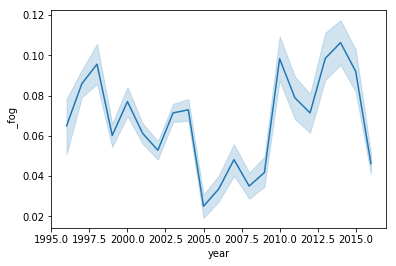

In [68]:
sns.lineplot(x="year",y=" _fog",data=new_data)

##### The above picture depicts that FOG was less in the year between 2005 to 2009

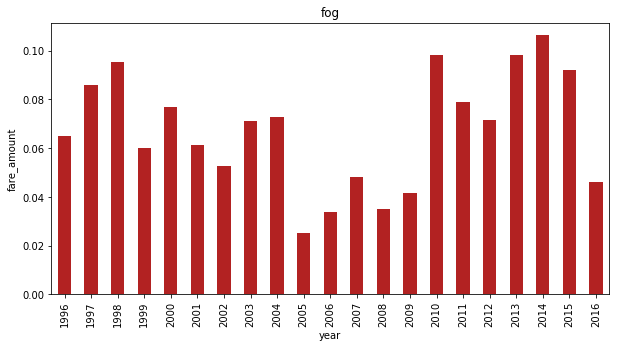

In [69]:
#Grouping mean fog by year to check for any relationship in a bar plot
year = pd.pivot_table(new_data, values = ' _fog', index = 'year', aggfunc = ['mean'])
fig, ax = plt.subplots(figsize = (10,5))
year.plot(kind = 'bar', legend = False, color = 'firebrick', ax = ax)
ax.set(title = 'fog', ylabel= 'fare_amount')
plt.show()

##### Fog is less in the year between 2005 to 2009

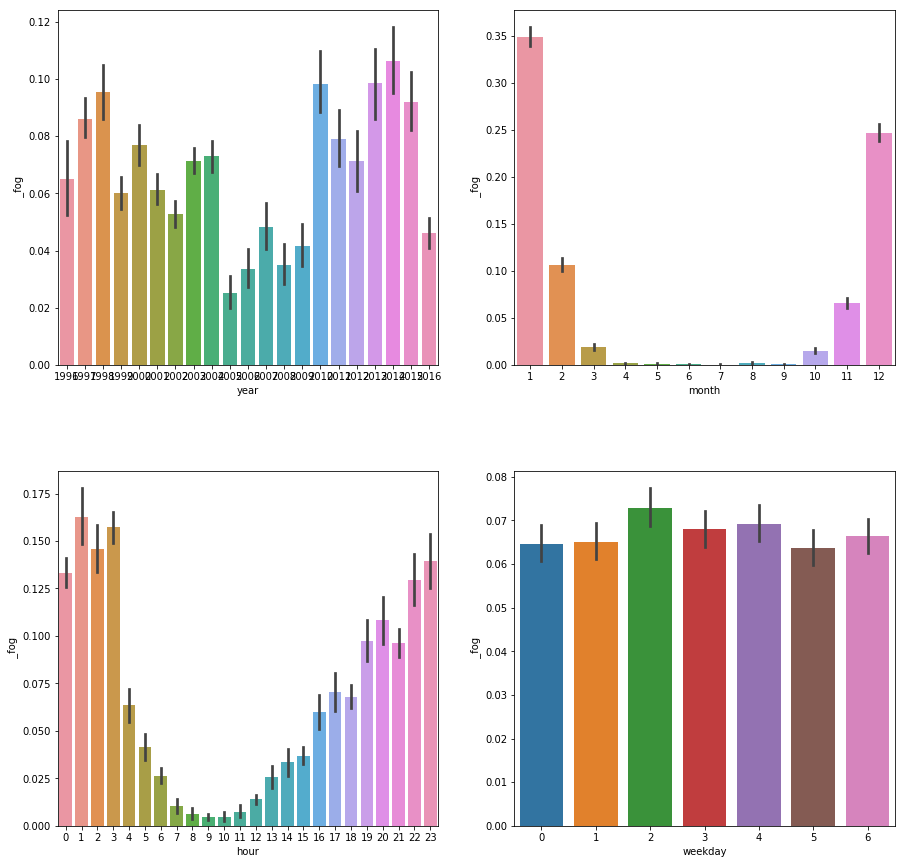

In [70]:
fig, axarr = plt.subplots(2, 2, figsize=(15, 15))
plt.subplots_adjust(hspace=.3)
sns.barplot(x='year',y=' _fog',data=new_data,ax=axarr[0][0])
sns.barplot(x='month',y=' _fog',data=new_data,ax=axarr[0][1])
sns.barplot(x='weekday',y=' _fog',data=new_data,ax=axarr[1][1])
sns.barplot(x='hour',y=' _fog',data=new_data,ax=axarr[1][0])

##### Effect of fog in at different months and time

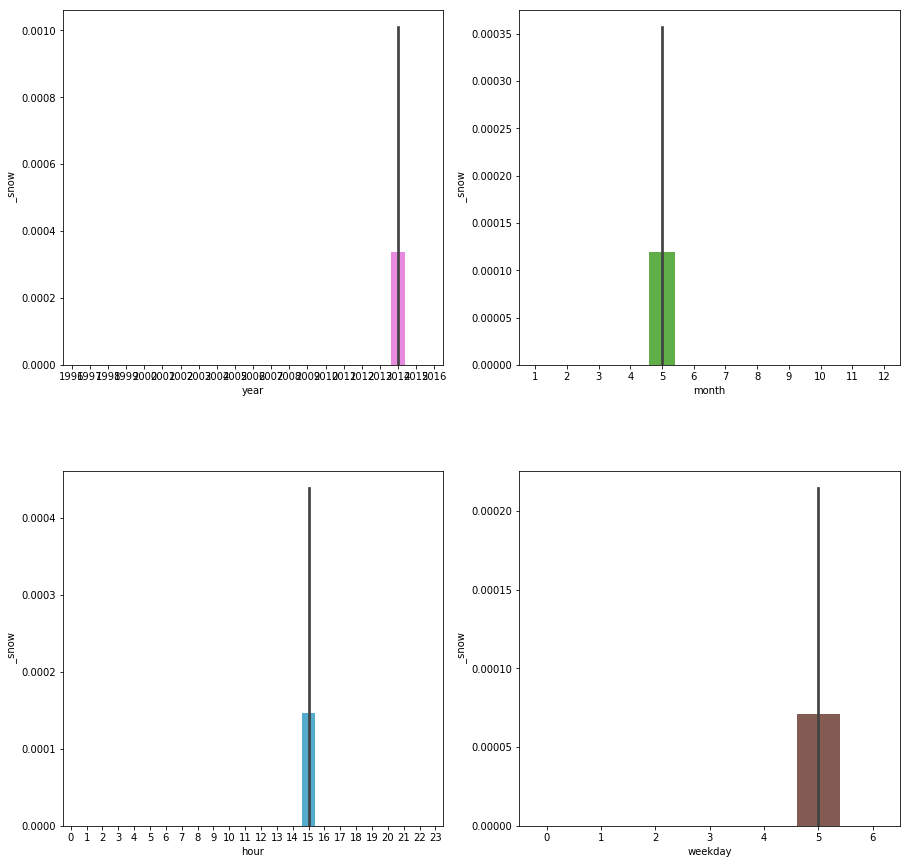

In [133]:
fig, axarr = plt.subplots(2, 2, figsize=(15, 15))
plt.subplots_adjust(hspace=.3)
sns.barplot(x='year',y=' _snow',data=new_data,ax=axarr[0][0])
sns.barplot(x='month',y=' _snow',data=new_data,ax=axarr[0][1])
sns.barplot(x='weekday',y=' _snow',data=new_data,ax=axarr[1][1])
sns.barplot(x='hour',y=' _snow',data=new_data,ax=axarr[1][0])

##### Showing not such important information about snow and the time 

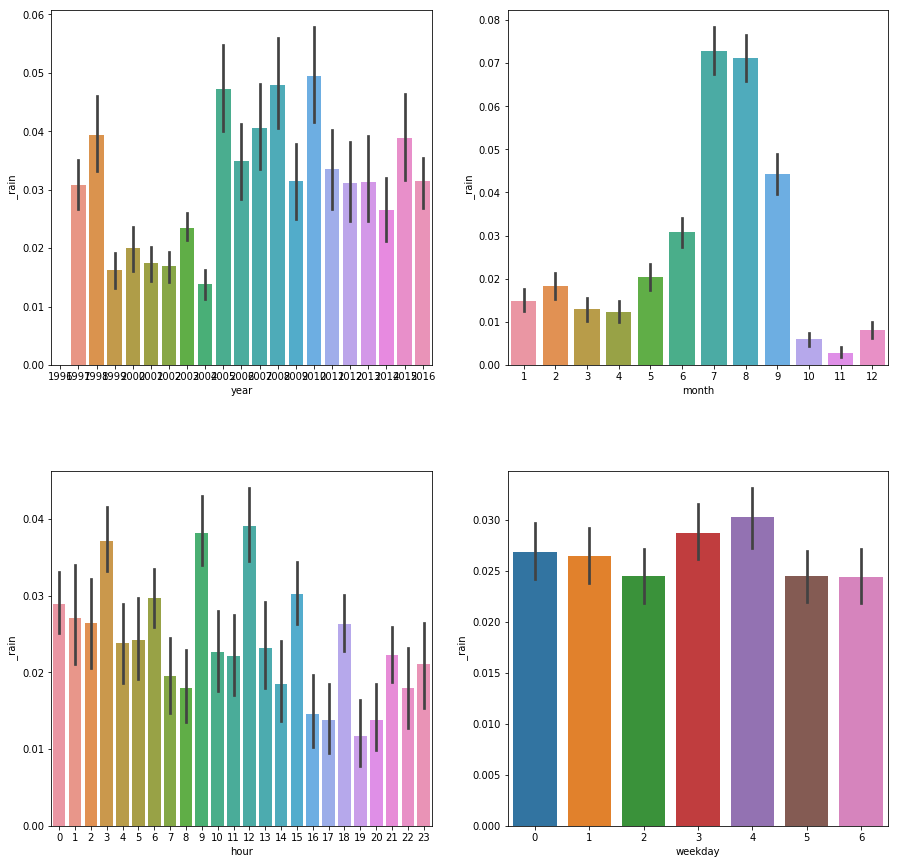

In [134]:
fig, axarr = plt.subplots(2, 2, figsize=(15, 15))
plt.subplots_adjust(hspace=.3)
sns.barplot(x='year',y=' _rain',data=new_data,ax=axarr[0][0])
sns.barplot(x='month',y=' _rain',data=new_data,ax=axarr[0][1])
sns.barplot(x='weekday',y=' _rain',data=new_data,ax=axarr[1][1])
sns.barplot(x='hour',y=' _rain',data=new_data,ax=axarr[1][0])

#### rain was less in the year between 1999 to 2004
##### Most of the times it rained in rainy season only between June to September

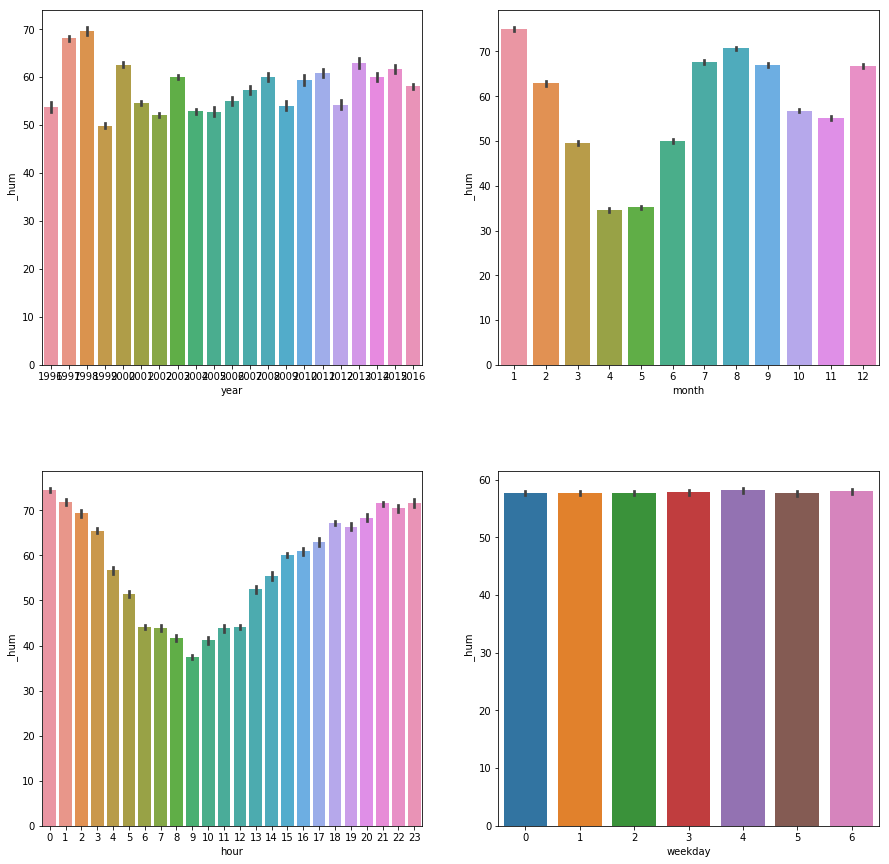

In [135]:
fig, axarr = plt.subplots(2, 2, figsize=(15, 15))
plt.subplots_adjust(hspace=.3)
sns.barplot(x='year',y=' _hum',data=new_data,ax=axarr[0][0])
sns.barplot(x='month',y=' _hum',data=new_data,ax=axarr[0][1])
sns.barplot(x='weekday',y=' _hum',data=new_data,ax=axarr[1][1])
sns.barplot(x='hour',y=' _hum',data=new_data,ax=axarr[1][0])

#### April and May are less humid as compared to other months and morning hours are less humid

### We will check for seasonality in the data and will try to make it non-stationary

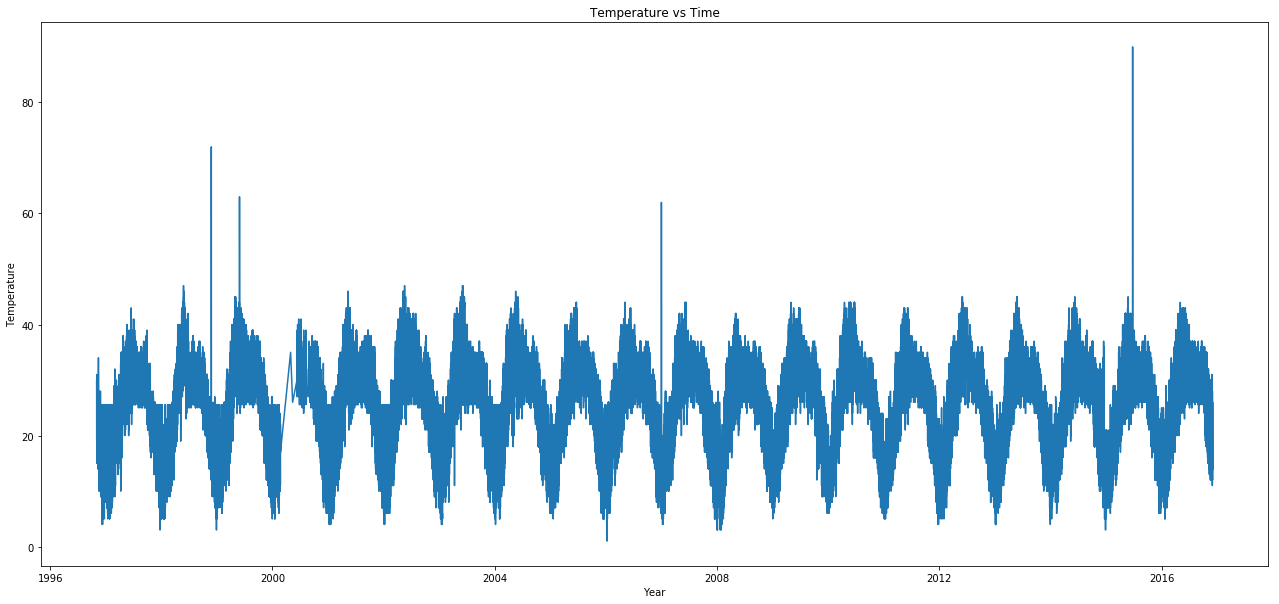

In [71]:
plt.figure(figsize=(22,10))
plt.plot(data.datetime_utc,new_data.temperature)
plt.title("Temperature vs Time")
plt.xlabel("Year")
plt.ylabel("Temperature")
plt.show()

In [72]:
 #adfuller library 
from statsmodels.tsa.stattools import adfuller
# check_adfuller
def check_adfuller(ts):
    # Dickey-Fuller test
    result = adfuller(ts, autolag='AIC')
    print('Test statistic: ' , result[0])
    print('p-value: '  ,result[1])
    print('Critical Values:' ,result[4])
# check_mean_std
def check_mean_std(ts):
    #Rolling statistics
    rolmean = ts.rolling(6).mean()
    rolstd = ts.rolling(6).std()
    plt.figure(figsize=(22,10))   
    orig = plt.plot(ts, color='red',label='Original')
    mean = plt.plot(rolmean, color='black', label='Rolling Mean')
    std = plt.plot(rolstd, color='green', label = 'Rolling Std')
    plt.xlabel("Date")
    plt.ylabel("Mean Temperature")
    plt.title('Rolling Mean & Standard Deviation')
    plt.legend()
    plt.show()

In [94]:
timeSeries = new_data.loc[:, ["date","temperature"]]
timeSeries.index = timeSeries.date
ts = timeSeries.drop("date",axis=1)

In [95]:
ts.head()

,temperature
date,
1996-11-01 11:00:00,30.0
1996-11-01 12:00:00,28.0
1996-11-01 13:00:00,24.0
1996-11-01 14:00:00,24.0
1996-11-01 16:00:00,23.0


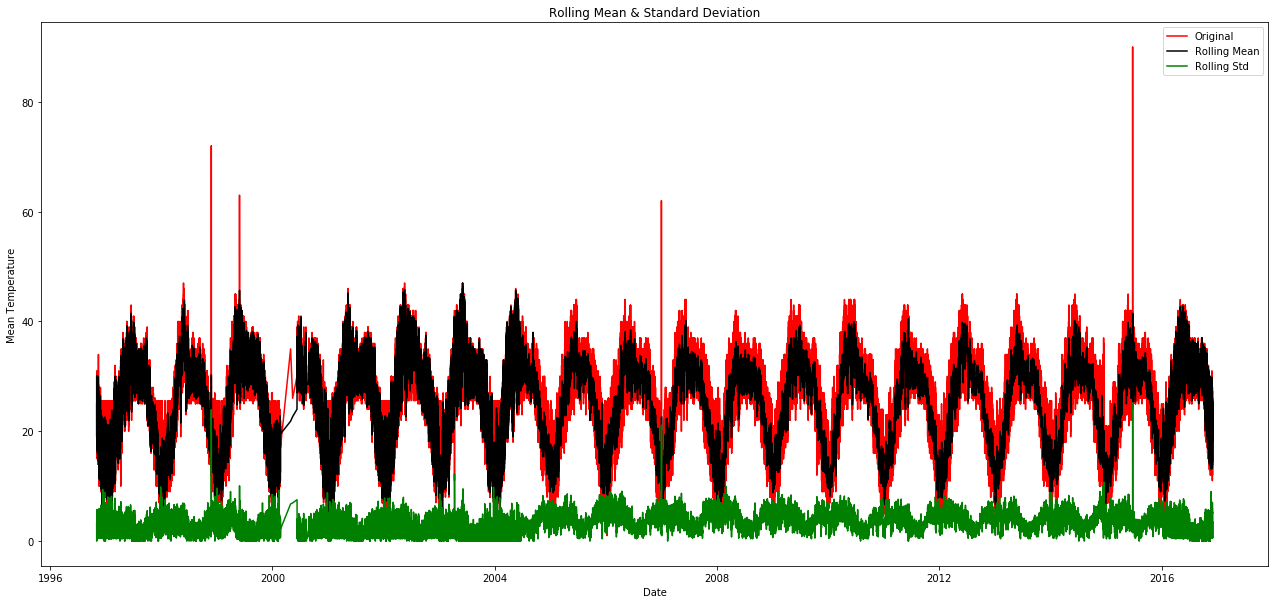

Test statistic:  -7.60331815227957
p-value:  2.3577193985557362e-11
Critical Values: {'1%': -3.4304161595021574, '5%': -2.8615692414596667, '10%': -2.5667855642064112}


In [96]:
check_mean_std(ts)
check_adfuller(ts.temperature)

In [118]:
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
order=(2,1,2) 
model=model = ARIMA(ts,order)

C:\Users\vikaa\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\vikaa\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [120]:
Train=ts.iloc[:70000,:]
valid=ts.iloc[70001,:]

In [132]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing, Holt
y_hat_avg = valid.copy() 
fit1 = Holt(np.asarray(Train['temperature'])).fit(smoothing_level = 0.3,smoothing_slope = 0.1)
y_hat_avg['Holt_linear'] = fit1.forecast(len(valid)) 
plt.figure(figsize=(16,8)) 
plt.plot(Train['temperature'], label='Train') 
plt.plot(valid['temperature'], label='Valid') 
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear') 
plt.legend(loc='best') 
plt.show()

ValueError: attempt to get argmin of an empty sequence

### Creating a test sample

In [77]:
new_data.shape

(98913, 26)

In [78]:
k=90000
test=new_data.iloc[k:-1,:]

In [79]:
k=89999
train=new_data.iloc[0:k,:]

In [80]:
train.shape

(89999, 26)

In [81]:
test.shape

(8912, 26)

In [33]:
train.temperature.unique()

array([30.        , 28.        , 24.        , 23.        , 21.        ,
       19.        , 20.        , 22.        , 26.        , 31.        ,
       27.        , 25.        , 17.        , 16.        , 29.        ,
       18.        , 15.        , 25.57842718, 14.        , 34.        ,
       13.        , 12.        , 11.        , 10.        ,  9.        ,
        8.        ,  7.        ,  6.        ,  5.        ,  4.        ,
       32.        , 33.        , 35.        , 36.        , 37.        ,
       38.        , 39.        , 40.        , 42.        , 41.        ,
       43.        ,  3.        , 44.        , 47.        , 45.        ,
       46.        , 72.        , 63.        ,  1.        , 62.        ])

### Applying simple model and testing its accuracy

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_log_error , mean_squared_error
X_train,X_test,y_train,y_test=train_test_split(train.iloc[:,0:24],train['temperature'],test_size=0.3)